In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('../datasets/cleveland.csv', header = None)

In [3]:
dataset.columns =  ['age', 'sex', 'cp', 'trestbps', 'chol','fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 
                    'slope', 'ca', 'thal', 'target']

In [4]:
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


Find the empty value in a column

In [5]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

Change the value target from 0, 1, 2, 3, 4 to 0 or 1. In other word simplify the dataset whether the patient have a heart disease or not

In [6]:
dataset['target'] = dataset['target'].map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})

Fill the empty value in thal column with sum method

In [7]:
dataset['thal'] = dataset['thal'].fillna(dataset['thal'].mean())

Fill the empty value in thal column with sum method

In [8]:
dataset['ca'] = dataset['ca'].fillna(dataset['ca'].mean())

EDA

Age

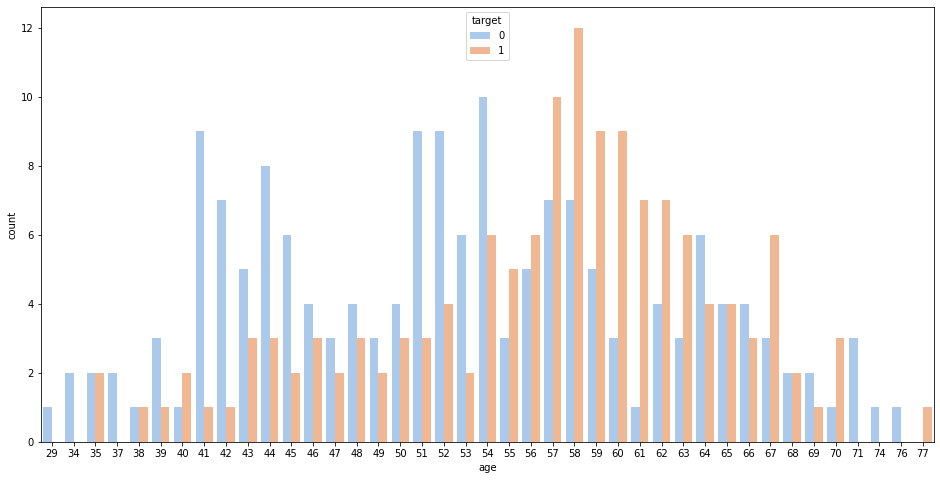

In [9]:
plt.figure(figsize = (16, 8))
sns.countplot(x = 'age', data = dataset, hue = 'target', palette = 'pastel')

Gender

In [10]:
gender = dataset['sex'].map({0: 'female', 1: 'male'})

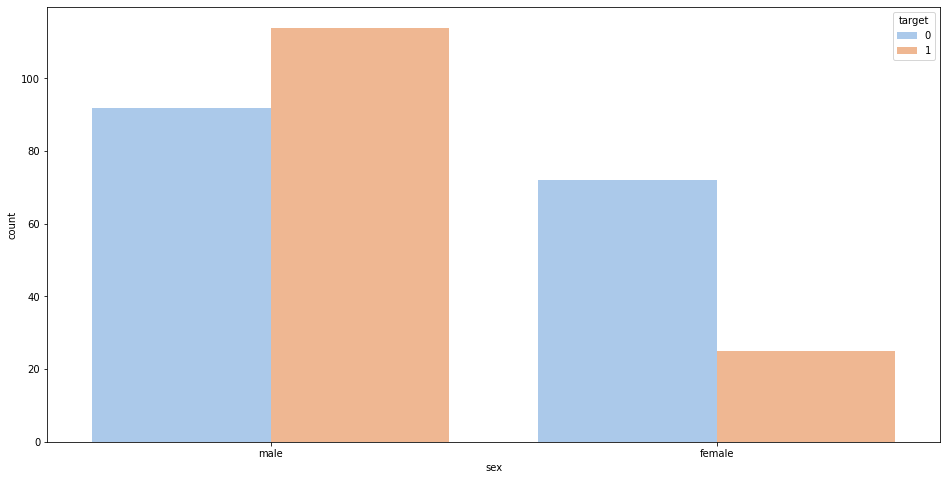

In [11]:
plt.figure(figsize = (16, 8))
sns.countplot(x = gender ,hue = dataset['target'], palette = 'pastel')

<h3>Maximum Heart Rate vs Age</h3>

From the scatter plot below, we can say that most of the patient age between 50 to 60 have a higher chance getting a CVD 

Text(0, 0.5, 'maximum heart rate')

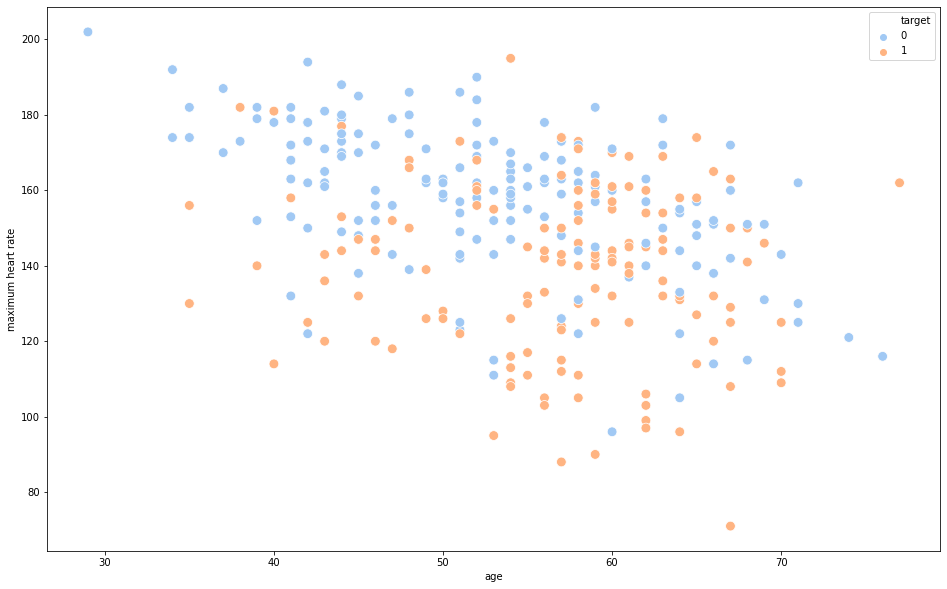

In [12]:
plt.figure(figsize = (16, 10))

sns.scatterplot(x = 'age', y = 'thalach', data = dataset, hue = 'target', palette = 'pastel', s = 95)

plt.ylabel('maximum heart rate')

Export Cleaned Dataset

In [13]:
dataset.to_csv('../datasets/cleaned_cleveland.csv', index = False)

<h3>Data Pre-processing</h3>

Split the dataset into train and test

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = dataset.iloc[:, :-1].values

In [16]:
y = dataset.iloc[:, -1].values

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Apply standard scaler 

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_train = scaler.fit_transform(X_train)

In [21]:
X_test = scaler.transform(X_test)

Import KNN from SKLearn

In [22]:
from sklearn.neighbors import KNeighborsClassifier

Finding the best K Value

In [23]:
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

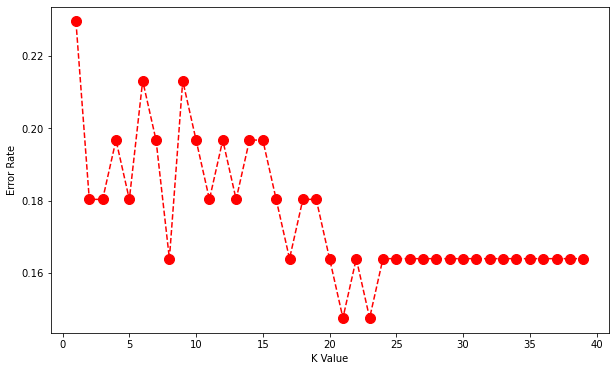

In [24]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color = 'red', linestyle = 'dashed', marker = 'o', markersize = 10)
plt.xlabel('K Value')
plt.ylabel('Error Rate')

Applying KNN to the dataset

In [25]:
classifier = KNeighborsClassifier(n_neighbors = 21)

In [26]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=21, p=2,
                     weights='uniform')

In [27]:
y_pred = classifier.predict(X_test)

Accuracy of the prediction

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

In [29]:
print(confusion_matrix(y_test, y_pred))

[[34  1]
 [ 8 18]]


In [30]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88        35
           1       0.95      0.69      0.80        26

    accuracy                           0.85        61
   macro avg       0.88      0.83      0.84        61
weighted avg       0.87      0.85      0.85        61



Tree


In [35]:
import graphviz 

ModuleNotFoundError: No module named 'graphviz'